In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

# Import Regression Models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
# Load dataset
cars_df = pd.read_csv("Resources/cars_info.csv")
cars_df.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [3]:
# Drop unnecessary columns
cars_df.drop(columns=['ID', 'Variant', 'Series', 'CC'], inplace=True)
cars_df.head()

,Name,Price,Brand,Model,Year,Kilometers,Type,Gearbox,Fuel,Status,Color,Seating Capacity
0,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,Grey,5
1,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,2021,19,Wagon,Automatic,Diesel,New In Stock,Black,7
2,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,2021,24,Wagon,Automatic,Diesel,New In Stock,Black,8
3,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,2010,120579,Cabriolet,Automatic,Diesel,Used,Black,4
4,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,White,5


In [4]:
# Define features and target variable
# Independent variables
X = cars_df.drop(columns=['Price']) 
print(X)

                                                    Name          Brand  \
0                      2010 Toyota Rukus Build 2 AZE151R         Toyota   
1      2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...  Mercedes-Benz   
2      2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...  Mercedes-Benz   
3             2010 Mercedes-Benz E250 CDI Avantgarde 207  Mercedes-Benz   
4                           2016 Holden Cruze CD JH MY16         Holden   
...                                                  ...            ...   
17043                 2003 Holden Commodore Executive VY         Holden   
17044                        2008 Toyota Yaris YR NCP90R         Toyota   
17045               2002 Holden Jackaroo SE LWB (4X4) U8         Holden   
17046               2016 Hyundai I30 Active GD4 Series 2        Hyundai   
17047              2005 Toyota RAV4 Cruiser (4X4) ACA23R         Toyota   

           Model  Year  Kilometers         Type    Gearbox             Fuel  \
0          Rukus  20

In [5]:
# Target variable (Price)
y = cars_df['Price']
print(y)

0          9999
1        117990
2         79990
3         34990
4         15990
          ...  
17043      4499
17044      4999
17045      7999
17046     14000
17047      5999
Name: Price, Length: 17048, dtype: int64


In [6]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [7]:
# Preprocessing: Encode categorical variables & scale numerical features
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

In [8]:
# Define models for evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Lasso Regression": Lasso(alpha=0.1) 
}

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression - R² Score: 0.787, MAE: 5501.02
Random Forest - R² Score: 0.790, MAE: 5372.52
Gradient Boosting - R² Score: 0.684, MAE: 8979.99


C:\Users\Sreekar Thimmareddy\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84811994857.68051, tolerance: 1280564331.235803
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso Regression - R² Score: 0.801, MAE: 5202.51

Model Comparison Results:
               Model  R² Score          MAE
0  Linear Regression  0.787249  5501.021672
1      Random Forest  0.789857  5372.515319
2  Gradient Boosting  0.683845  8979.985565
3   Lasso Regression  0.801324  5202.509174


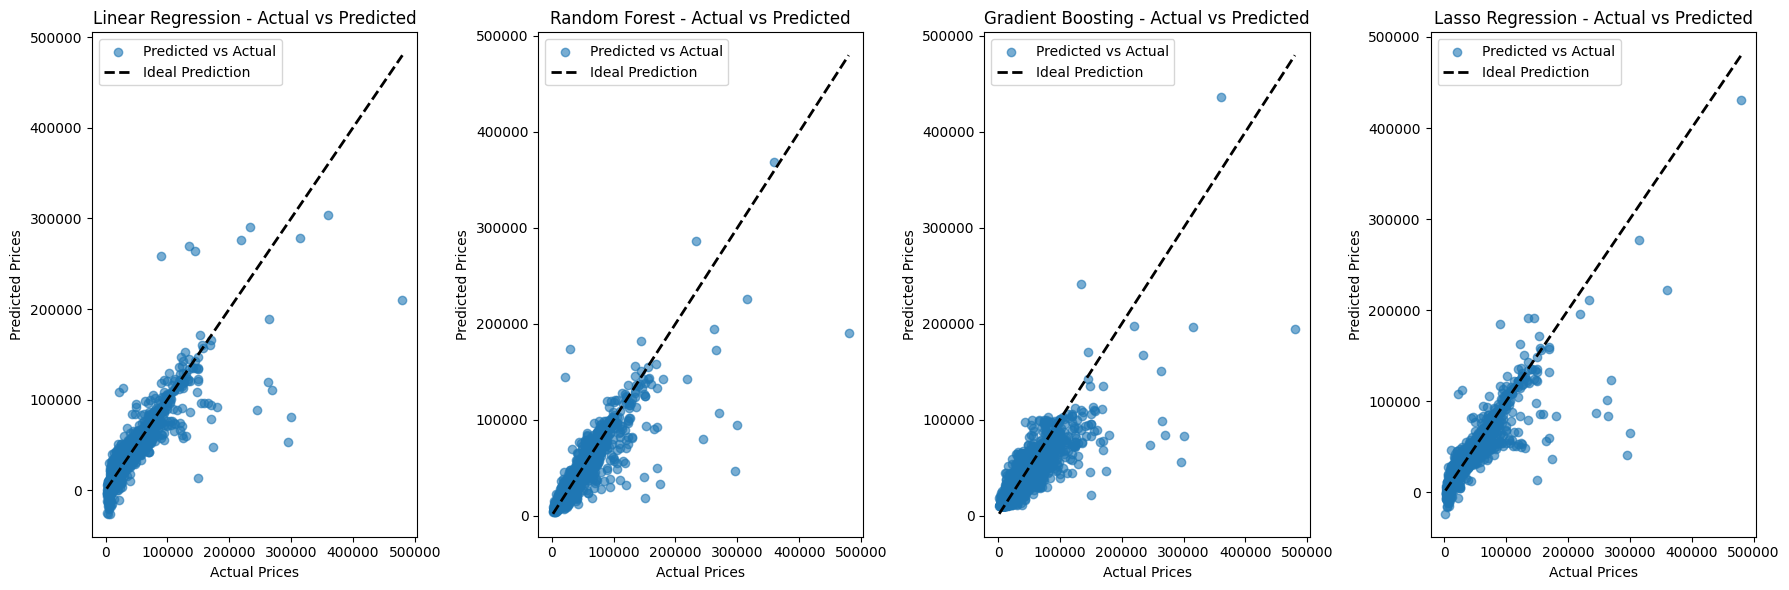

In [11]:

# Store results
results = []

# Create subplots for all 3 models
plt.figure(figsize=(18, 6))

# Train and evaluate each model
for i, (name, model) in enumerate(models.items(), 1):
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store results
    results.append({"Model": name, "R² Score": r2, "MAE": mae})

    # Print results
    print(f"{name} - R² Score: {r2:.3f}, MAE: {mae:.2f}")
    
    # Create a scatter plot for each model
    plt.subplot(1, 4, i)
    plt.scatter(y_test, y_pred, alpha=0.6, label="Predicted vs Actual")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Prediction")
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{name} - Actual vs Predicted')
    plt.legend()

# Display comparison of models
results_df = pd.DataFrame(results)

# Display the comparison table
print("\nModel Comparison Results:")
print(results_df)

# Show all plots
plt.tight_layout()
plt.show()

,Model,R² Score,MAE
0,Linear Regression,0.787249,5501.021672
1,Random Forest,0.789857,5372.515319
2,Gradient Boosting,0.683845,8979.985565
3,Lasso Regression,0.801324,5202.509174


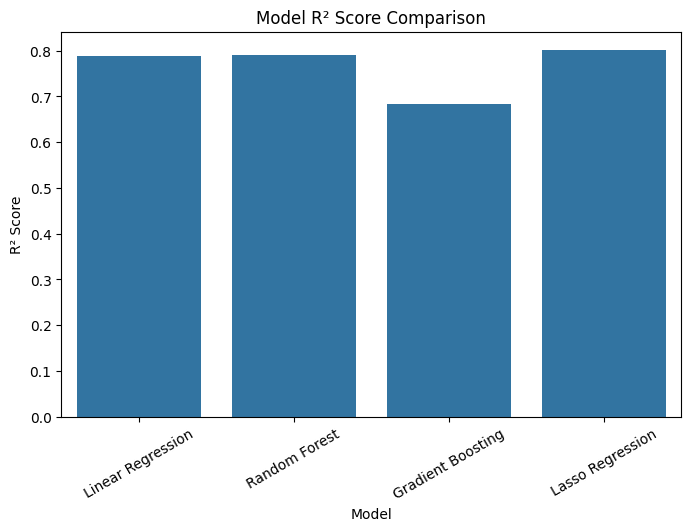

In [12]:
# Display results
display(results_df)

# Plot model performance
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="R² Score", data=results_df)
plt.title("Model R² Score Comparison")
plt.ylabel("R² Score")
plt.xticks(rotation=30)
plt.show()

In [20]:
# Use the best model (highest R² Score) for predictions
best_model_name = results_df.sort_values(by="R² Score", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

print(f"\n✅ Best Model Selected: {best_model_name}")




✅ Best Model Selected: Lasso Regression


In [23]:
new_car_data = {
    'Name': ['2010 Toyota Rukus Build 2 AZE151R	'],
    'Brand': ['Toyota'],
    'Model': ['Rukus'],
    'Year': [2010],
    'Kilometers': [263000],
    'Type': ['Wagon'],
    'Gearbox': ['Automatic'],
    'Fuel': ['Unleaded Petrol'],
    'Status': ['Used'],
    'Color': ['Grey'],
    'Seating Capacity': [5]
}

# Create DataFrame for new car
new_car = pd.DataFrame(new_car_data)

# Use the same preprocessor as used for training
new_car_preprocessed = preprocessor.transform(new_car)

# Predict the price using the best model (assuming best_model is already trained)
predicted_price = best_model.predict(new_car_preprocessed)

# Print the predicted price
print(f"\n💰 Predicted Price for New Car: ${predicted_price[0]:,.2f}")


💰 Predicted Price for New Car: $11,494.24


In [28]:
import joblib

# Assuming `model` is the trained model object
joblib.dump(best_model, 'lasso_model.pkl')

['lasso_model.pkl']